# The *new* **Network** Class

## Intro

This notebook demonstrates the new design of skrf's **Network** Class. The new class utilizes a more object-oriented approach which is cleaner and more scalable. The draw-back is that it breaks backward compatibility.

Creating a *new style* **Network** from an old

In [1]:
import skrf as rf 
%matplotlib inline
from pylab import * 
rf.stylely()

from skrf import network2

a = network2.Network.from_ntwkv1(rf.data.ring_slot)

The new **Network** class employs nested objects, which makes for a cleaner and more logical namespace. The basic structure is:

* **Network**
    * **Frequency ** (same as before)
    * **Parameter** (s,z,y,etc)
        * **Projection** ( db10, db20, deg, mag,etc)
 
 

## Network Parameters

Accessing a Network's parameters like `s`,`z`,or `y` returns a  **Parameters** object,

In [2]:
type(a.s)

skrf.network2.S

You can get at the array by accessing the property `val`.

In [3]:
a.s.val[:3]

array([[[-0.50372318+0.4578448j ,  0.6134571 +0.36678139j],
        [ 0.6134571 +0.36678139j, -0.19958433+0.6483347j ]],

       [[-0.49581904+0.45707698j,  0.6218194 +0.36403169j],
        [ 0.6218194 +0.36403169j, -0.19079812+0.64429556j]],

       [[-0.48782538+0.4561578j ,  0.63024301+0.36109574j],
        [ 0.63024301+0.36109574j, -0.18198848+0.64003909j]]])

You can also slice the parameter directly. This can be used as an alternative way to access the values. 

In [4]:
a.s[:2]

array([[[-0.50372318+0.4578448j ,  0.6134571 +0.36678139j],
        [ 0.6134571 +0.36678139j, -0.19958433+0.6483347j ]],

       [[-0.49581904+0.45707698j,  0.6218194 +0.36403169j],
        [ 0.6218194 +0.36403169j, -0.19079812+0.64429556j]]])

This nested-object desgin allows for more concise function calls. For example, plot functions become members of the parameters, which behave like you expect

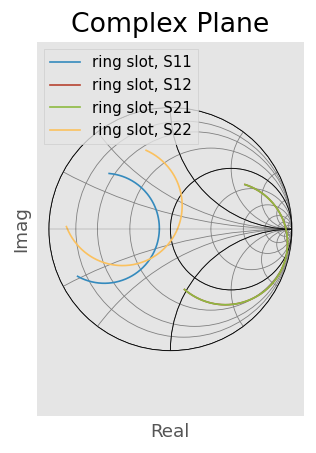

In [5]:
a.s.plot()

(0.08615315203441021, 1338.578314302225, -934.873741799303, 961.9694237863985)

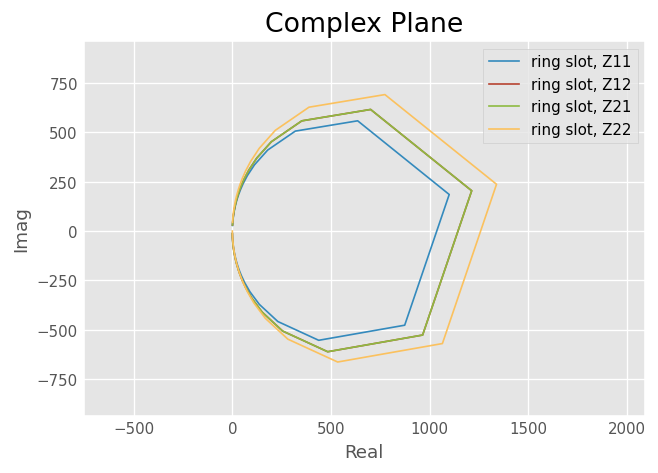

In [6]:
a.z.plot()
axis('equal')

## Projections

Each parameter has members for various scalar projections. 

In [7]:
type(a.s.db)

skrf.network2.Db20

In [8]:
type(a.s.deg)

skrf.network2.Deg

Their numerical values may be accessed through `val` attribute or by direct slicing, just like a **Parameter**

In [9]:
a.s.db[:2]

array([[[-3.34082483, -2.91699627],
        [-2.91699627, -3.37080014]],

       [[-3.4222167 , -2.84683359],
        [-2.84683359, -3.4532234 ]]])

Projections also `plot()` as you expect

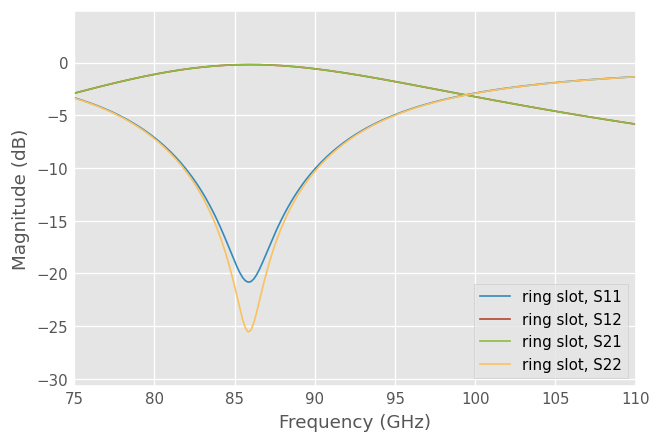

In [10]:
a.s.db.plot();

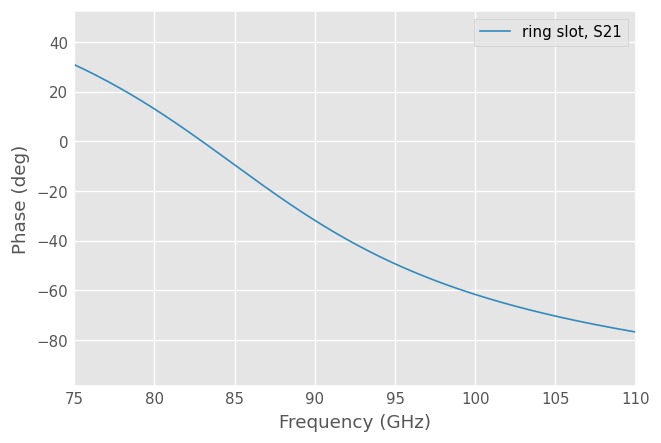

In [11]:
a.s.deg.plot(1,0);

## Ipython Notebook display system

One interesting advantage of using an object-oriented model for parameters and projections is that we can create [custom display logic](http://nbviewer.ipython.org/github/ipython/ipython/blob/master/examples/notebooks/Custom%20Display%20Logic.ipynb) for the ipython notebook.  This allows us to define graphical  representations for an object, removing the need to call any plot method.


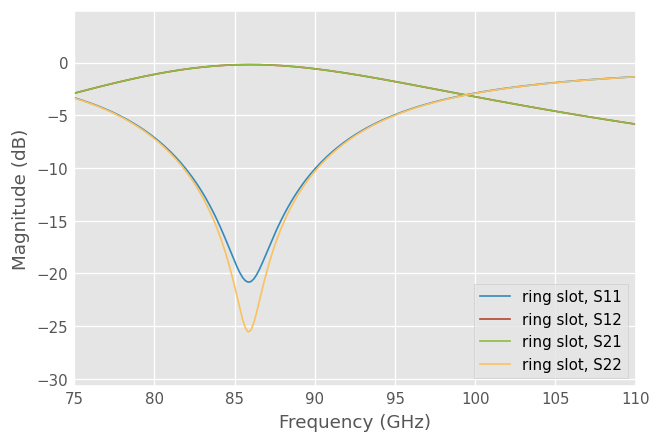

In [12]:
a.s.db

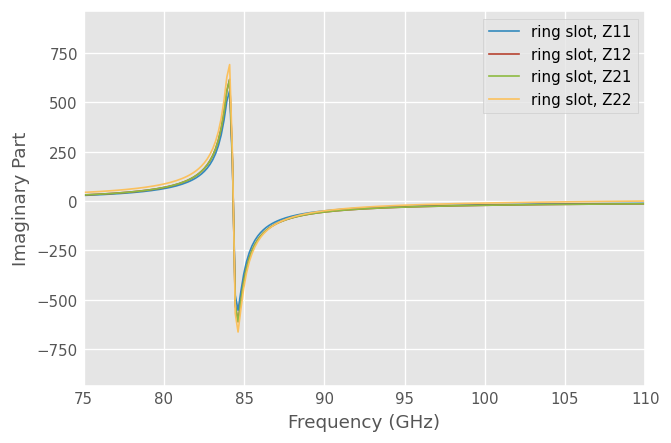

In [13]:
a.z.im

## Accessing numpy array properties

Numpy ndarray properties are accessable on both **Parameters** and **Projections **. These are implemented using python `__getattr__()` operator so they wont tab out, but you can still use em. 

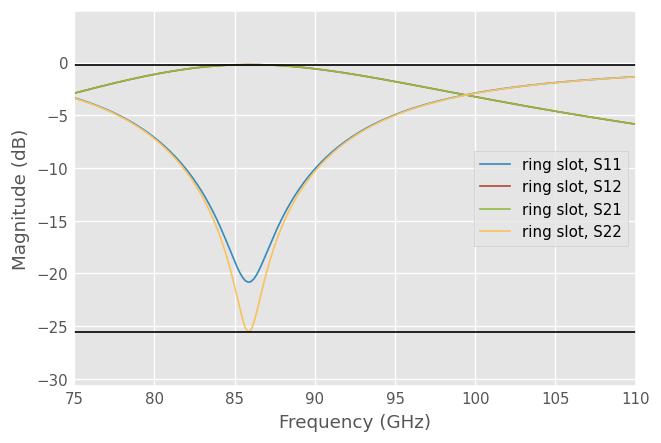

In [14]:
a.s.db.plot()
axhline(a.s.db.min(),color='k')
axhline(a.s.db.max(),color='k')

## Frequency Band Selection

Networks can sliced by an index on the frequency axis or by a human readable frequency selections,

In [15]:
a[40:100] #slice by frequency index

2-Port Network: 'ring slot',  82.0-92.325 GHz, 60 pts, z0=[50.+0.j 50.+0.j]

In [16]:
a['82-92ghz'] # slice by a human readable string

2-Port Network: 'ring slot',  82.0-91.975 GHz, 58 pts, z0=[50.+0.j 50.+0.j]

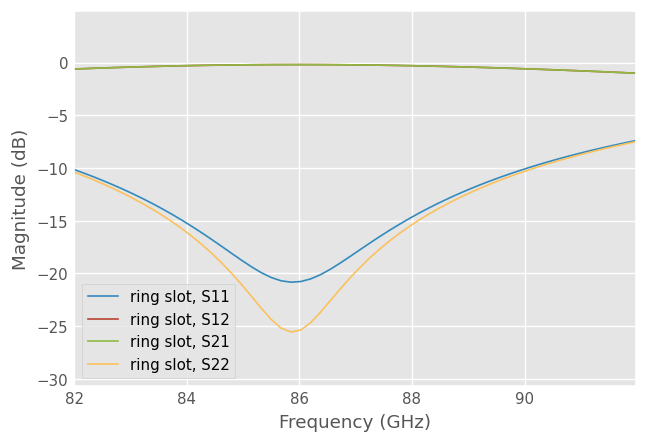

In [17]:
a['82-92ghz'].s.db

## Subnetworks

Individual s-parameters  can be accessed by calling a **Network** with the desired port indecies (*index starting from 0*)

In [18]:
s11 = a(0,0) # s11
s22 = a(1,1) # s22
s12 = a(0,1) # s12
s21 = a(1,1) # s21

s11

1-Port Network: 'ring slot',  75.0-110.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]

## Time domain

Time domain transform is implemented as a Parameter named `s_time`. Note that accessing this parameter implicitly  windows the s-parameters before taking the FFT. For finer control over the transform, use the functions `s2time`  and `windowed`.

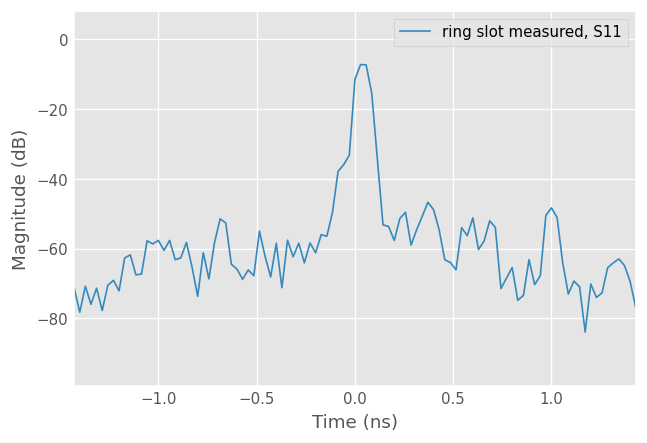

In [19]:
b = network2.Network.from_ntwkv1(rf.data.ring_slot_meas)
b.s_time.db